## WEEK-3 VISUALIZATION ASSIGNMENT


**Importing Libraries**

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [24]:

df = pd.read_csv(r"C:\Users\asinf\OneDrive\Desktop\student_habits_performance.csv")

# Display first few rows
print(df.head())

# Basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())


  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

## PLOTS

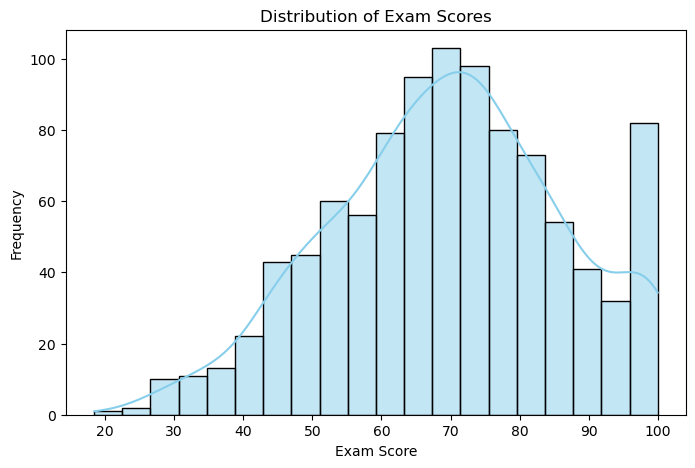

In [25]:
# 1. Histogram of Exam Scores
plt.figure(figsize=(8, 5))
sns.histplot(df['exam_score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

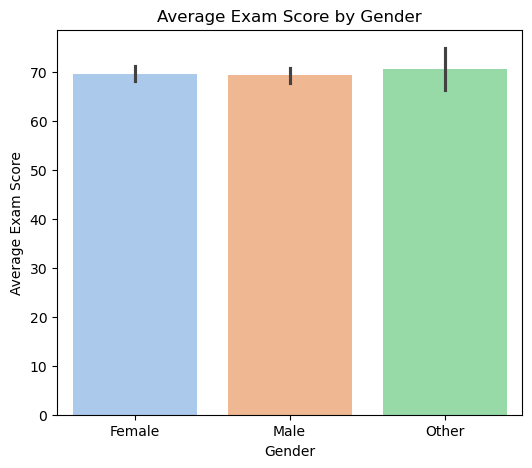

In [26]:
#2. Bar Chart: Average Exam Score by Gender
plt.figure(figsize=(6, 5))
sns.barplot(x='gender', y='exam_score', data=df, palette='pastel')
plt.title('Average Exam Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')
plt.show()

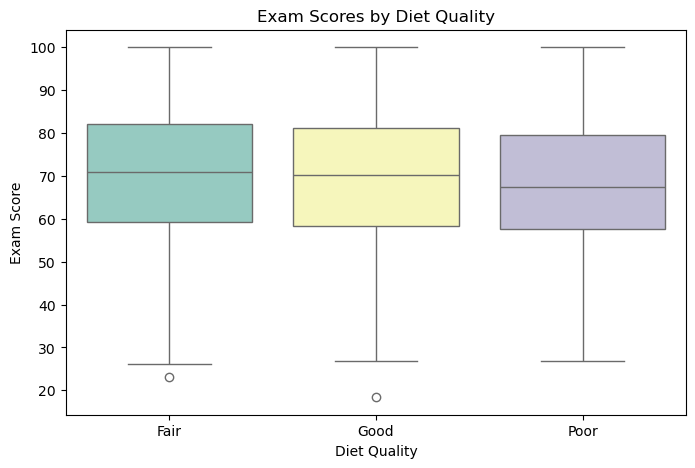

In [27]:
#3. Box Plot: Exam Scores by Diet Quality
plt.figure(figsize=(8, 5))
sns.boxplot(x='diet_quality', y='exam_score', data=df, palette='Set3')
plt.title('Exam Scores by Diet Quality')
plt.xlabel('Diet Quality')
plt.ylabel('Exam Score')
plt.show()

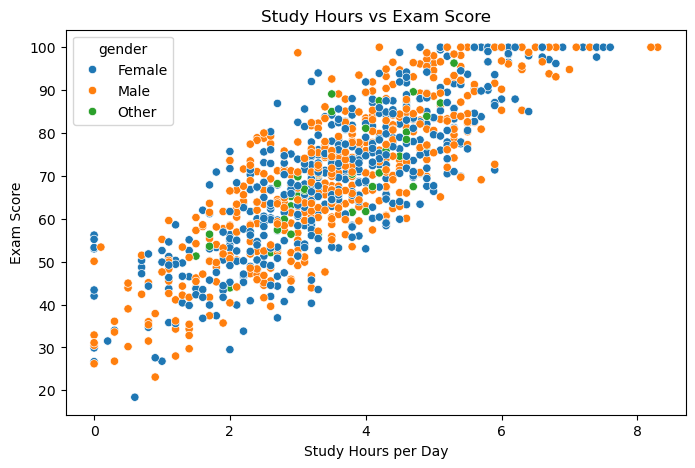

In [28]:
# 4. Scatter Plot: Study Hours vs Exam Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='study_hours_per_day', y='exam_score', hue='gender', data=df)
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.show()

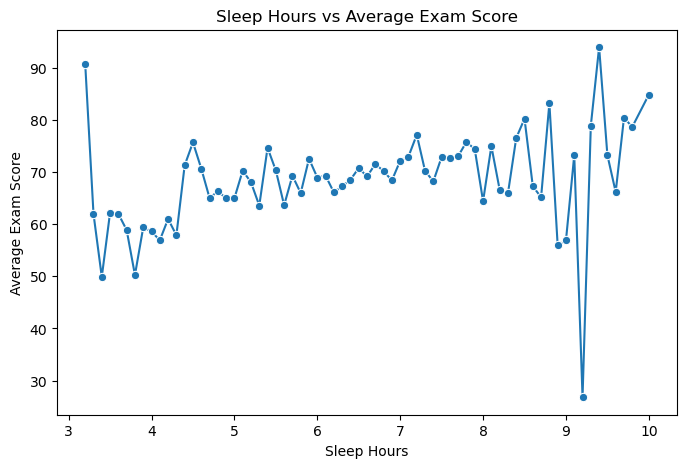

In [29]:
# 5. Line Plot: Sleep Hours vs Average Exam Score
plt.figure(figsize=(8, 5))
avg_scores_by_sleep = df.groupby('sleep_hours')['exam_score'].mean().reset_index()
sns.lineplot(x='sleep_hours', y='exam_score', data=avg_scores_by_sleep, marker='o')
plt.title('Sleep Hours vs Average Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Exam Score')
plt.show()

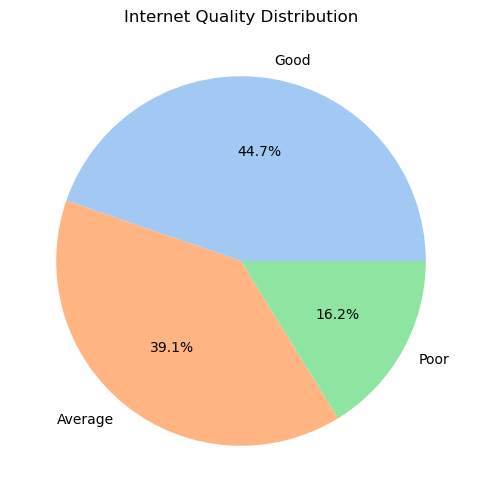

In [30]:
# 6. Pie Chart: Internet Quality Distribution
plt.figure(figsize=(6, 6))
df['internet_quality'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Internet Quality Distribution')
plt.ylabel('')
plt.show()

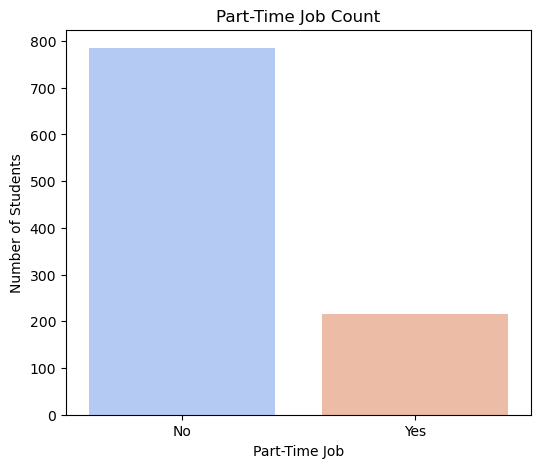

In [31]:
# 7. Count Plot: Part-Time Job Status
plt.figure(figsize=(6, 5))
sns.countplot(x='part_time_job', data=df, palette='coolwarm')
plt.title('Part-Time Job Count')
plt.xlabel('Part-Time Job')
plt.ylabel('Number of Students')
plt.show()

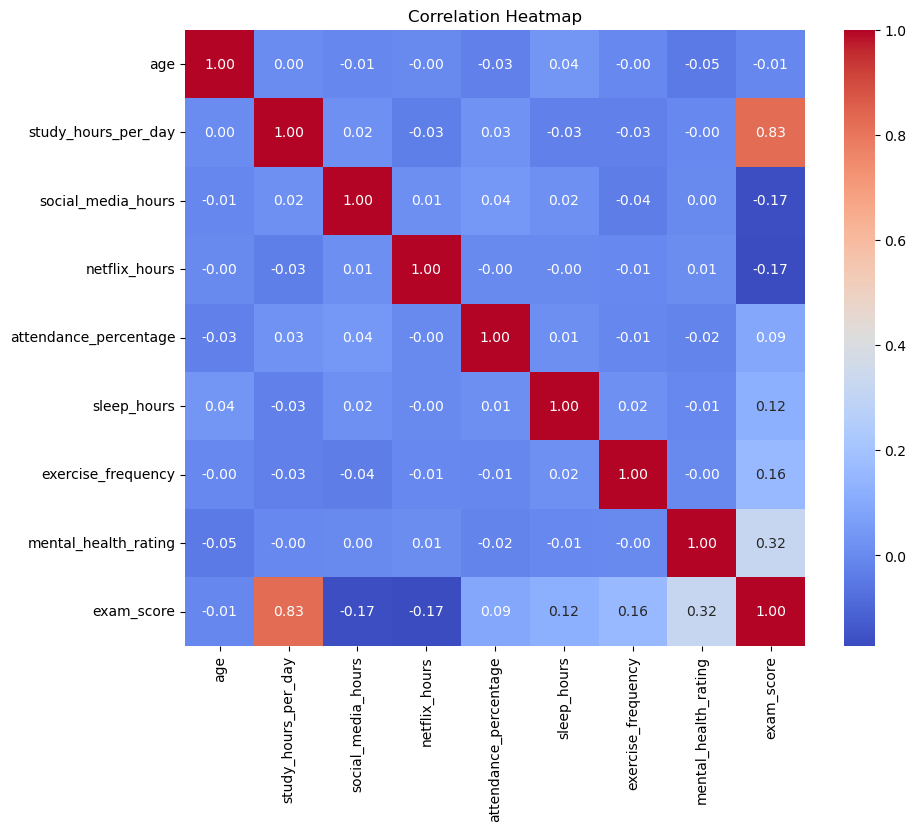

In [32]:
# 8. Heatmap: Correlation Matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

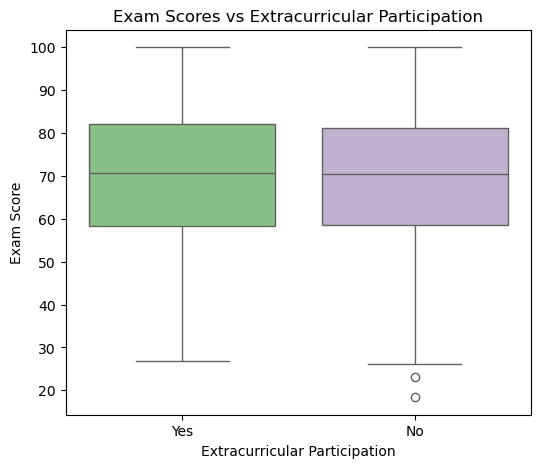

In [33]:
# 9. Box Plot: Exam Scores by Extracurricular Participation
plt.figure(figsize=(6, 5))
sns.boxplot(x='extracurricular_participation', y='exam_score', data=df, palette='Accent')
plt.title('Exam Scores vs Extracurricular Participation')
plt.xlabel('Extracurricular Participation')
plt.ylabel('Exam Score')
plt.show()

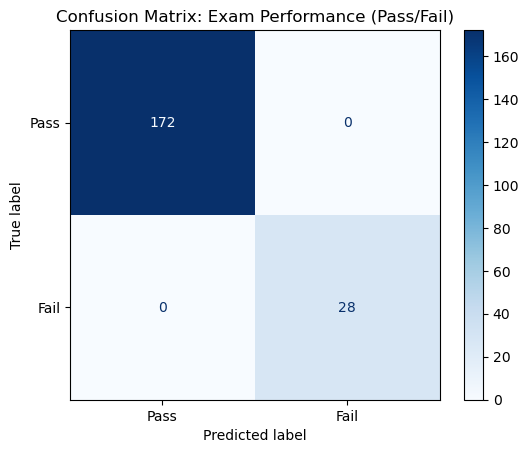

In [34]:
#10.Confusion Matrix: Exam Performance (Pass/Fail)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a binary label: Pass (>=50) or Fail (<50)
df['performance'] = np.where(df['exam_score'] >= 50, 'Pass', 'Fail')

# Convert categorical columns
df_encoded = pd.get_dummies(df.select_dtypes(include=['object']), drop_first=True)
X = pd.concat([df.select_dtypes(include=['float64', 'int64']), df_encoded], axis=1).drop(columns=['exam_score'])
y = df['performance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a simple model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predictions and confusion matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=['Pass', 'Fail'])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pass', 'Fail'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Exam Performance (Pass/Fail)')
plt.show()


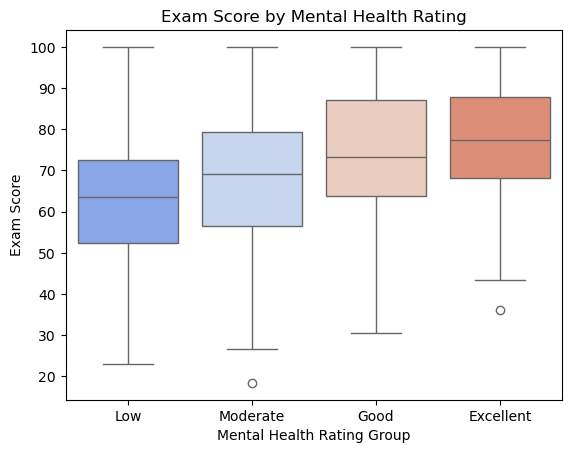

In [35]:
#11. Exam scores and mental health (BoxPlot)

df['mental_group'] = pd.cut(df['mental_health_rating'], bins=[0,3,6,8,10], labels=["Low","Moderate","Good","Excellent"])
sns.boxplot(data=df, x='mental_group', y='exam_score', palette='coolwarm')
plt.title("Exam Score by Mental Health Rating")
plt.xlabel("Mental Health Rating Group")
plt.ylabel("Exam Score")
plt.show()

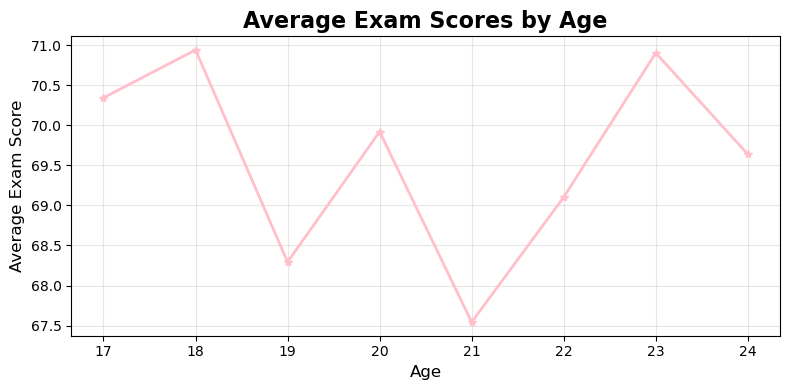

In [36]:
#12. Average Exam Scores By Age
age_scores = df.groupby('age')['exam_score'].mean()
plt.figure(figsize=(8, 4))
plt.plot(age_scores.index, age_scores.values, marker='*', color='pink', linewidth=2)
plt.title('Average Exam Scores by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Exam Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

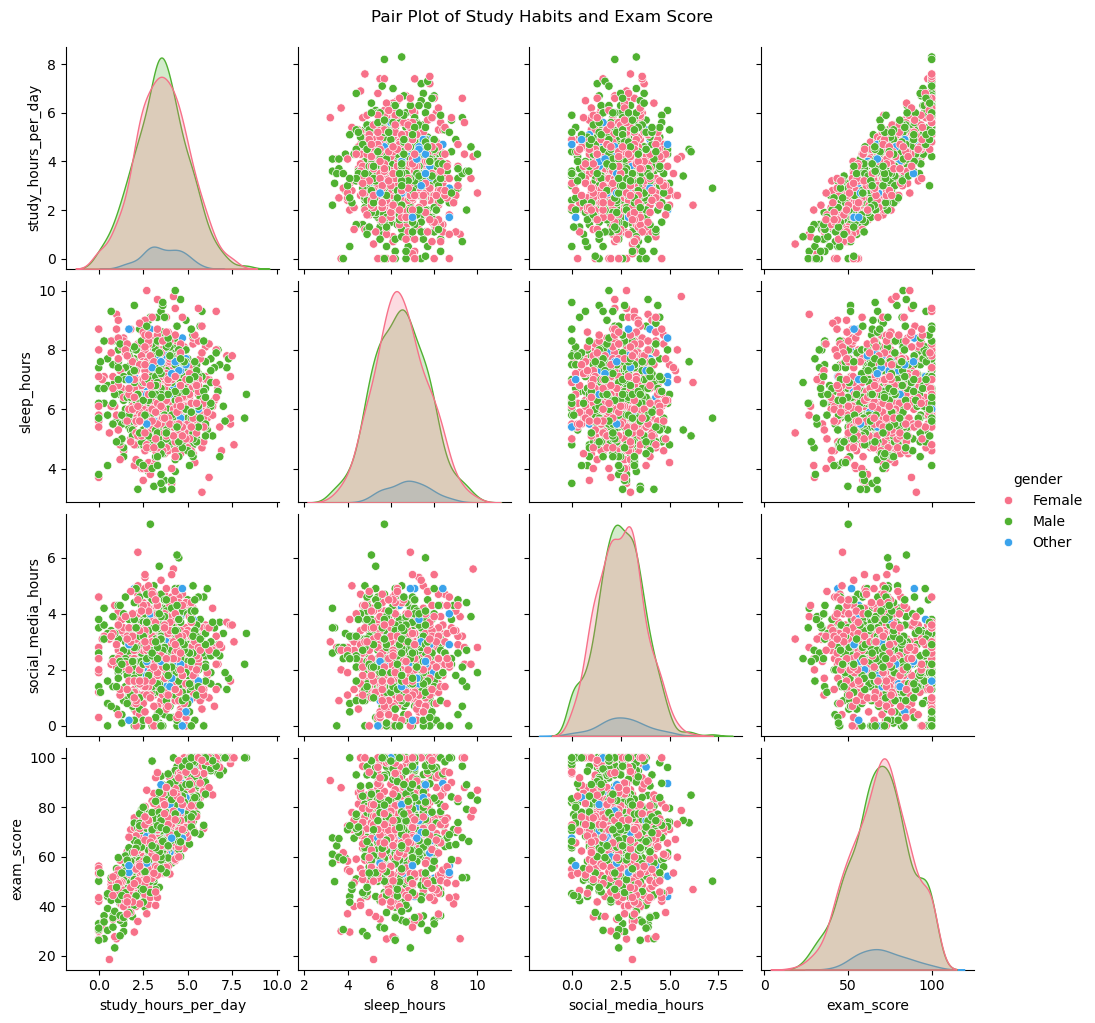

In [37]:
# 13. Pair Plot: Key continuous variables
sns.pairplot(df, vars=['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'exam_score'], hue='gender', palette='husl')
plt.suptitle("Pair Plot of Study Habits and Exam Score", y=1.02)
plt.show()

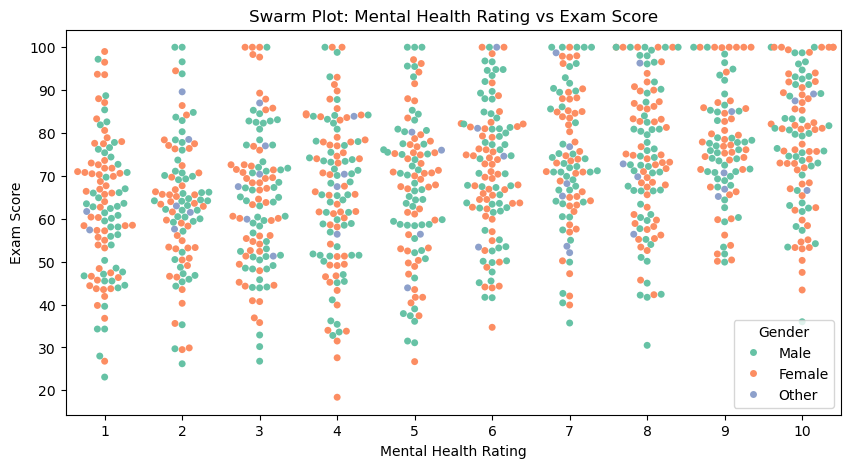

In [38]:
# 14. Swarm Plot: Mental Health Rating vs Exam Score
plt.figure(figsize=(10, 5))
sns.swarmplot(x='mental_health_rating', y='exam_score', data=df, hue='gender', palette='Set2')
plt.title('Swarm Plot: Mental Health Rating vs Exam Score')
plt.xlabel('Mental Health Rating')
plt.ylabel('Exam Score')
plt.legend(title='Gender')
plt.show()